# Search: Solving a Maze Using a Goal-based Agent

Student Name: Leilani Guzman

I have used the following AI tools: Github Copilot

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [649]:
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [650]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

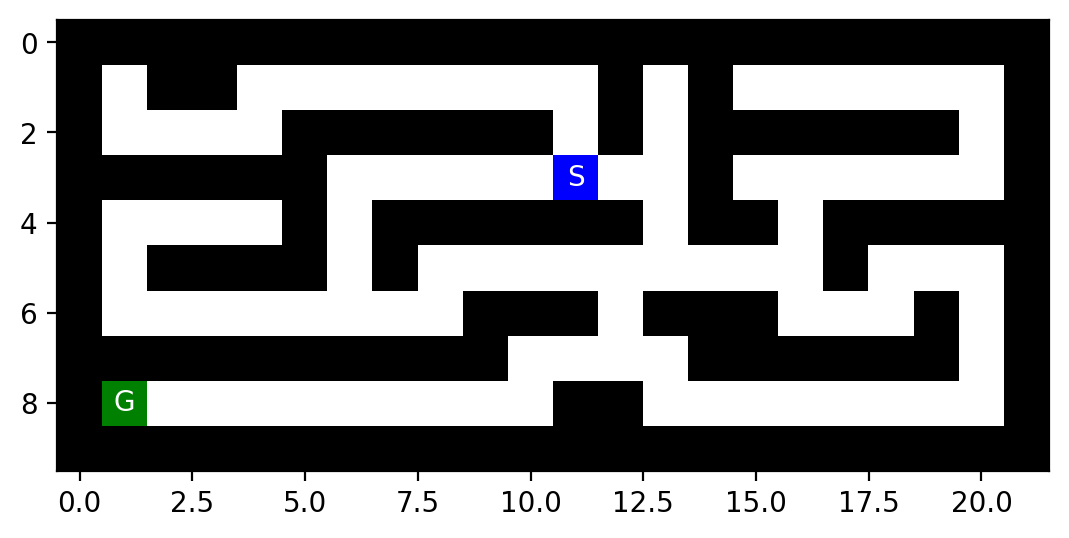

In [651]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [652]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [653]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\leila\documents\smu\cs7320-artificialintelligence\assignment 3\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [654]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

**Initial state**: the maze layout itself and the starting position of the agent.

**Actions**: The only actions the agent can perform are {North, South, East, or West}. This set of actions can be represented as set *A*.

**Transition Model**: The function that determines the new position of the agent after performing a certain action. This is calculated using a dircetion tuple from the list of action, where each action is represented as: "North" = (-1,0) , "South" = (1,0), "East" = (0,1), "West" = (0,-1). The new position is calculated by adding the direction tuple to the current position of the agent.

**Goal State**: The goal state is the position of the goal (G) in the maze, represented as a coordinate (x,y) or (row, col).

**Path Cost**: Each step the agent takes has a cost of 1. The path cost is the total number of steps it takes the agent to reach the goal state.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

1. *n* : state space size
    
    The state space size is the total number of possible states of the maze. For an empty maze with no walls this would be **MxN** where **M** is the number of rows and **N** is the number of columns. Otherwise, the state space would depend on the position of walls, the start and goal spaces, and the size of the maze.

2. *d* : depth of the optimal solution
    
    The depth of the optimal solution is the number of steps from the start state to the goal state via the shortest path. Determing this varies with the size of the maze and the positions of the start and goal states. However, generally this can be calculated from taking the path from the node at the goal state up until the root of the path (the start).

3. *m* : maximum depth of tree
    
    The maximum depth of the tree is the distance (number of steps) from the root node to the farthest node. This can be calculated by taking the path from the root node to the farthest node, if the children of the node are known. In this case there is no children attribute, so the maximum depth can be calculated by taking the path from each node added to the root and the farthest node is the maximum depth.

4. *b* : maximum branching factor
    
    The maximum branching factor is the max numebr of neighbors that can be explored from a given node. In the case of this maze, there are 4 possible directions that the agent can travel: North, South, East, or West. Therefore, the maximum branching factor is 4.


## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [655]:
########### BFS ###########
def bfs(maze, start, goal):
    actions = {"North": (-1, 0), "South": (1, 0), "East": (0, 1), "West": (0, -1)}
    max_tree_depth = 0
    num_nodes_expanded = 0 
    max_frontier_size = 0
    max_nodes_memory = 0
    # Set the current node as the start node
    current_node = Node(start, None, None, 0)
    # Create frontier queue with current node
    frontier = [current_node]
    reached = [current_node.pos]

    if maze[current_node.pos] == "G":
        return current_node.get_path_from_root(), current_node.cost, num_nodes_expanded, max_tree_depth, len(reached), max_frontier_size
    
    while frontier:
        num_nodes_expanded += 1
        max_nodes_memory += 1
        current_node = frontier.pop(0)
        # For each possibe neighbor of current node
        for action in actions:
            # Get neighbor position if it is not a wall
            neighbor_pos = (current_node.pos[0] + actions[action][0], current_node.pos[1] + actions[action][1])
            if neighbor_pos in reached or mh.look(maze, neighbor_pos) == "X":
                continue
            # Create neighbor node
            neighbor_node = Node(neighbor_pos, current_node, action, current_node.cost + 1)
            max_nodes_memory += 1
            # Adjust max tree depth
            if neighbor_node.cost > max_tree_depth:
                max_tree_depth = neighbor_node.cost
            # Check if neighbor is goal
            if maze[neighbor_pos] == "G":
                return neighbor_node.get_path_from_root(), neighbor_node.cost, len(reached), max_tree_depth, len(reached), max_frontier_size
            # Add neighbor to reached and frontier
            reached.append(neighbor_pos)
            frontier.append(neighbor_node)
            # Adjust max frontier size
            if frontier.__len__() > max_frontier_size:
                max_frontier_size = frontier.__len__()
    return None 

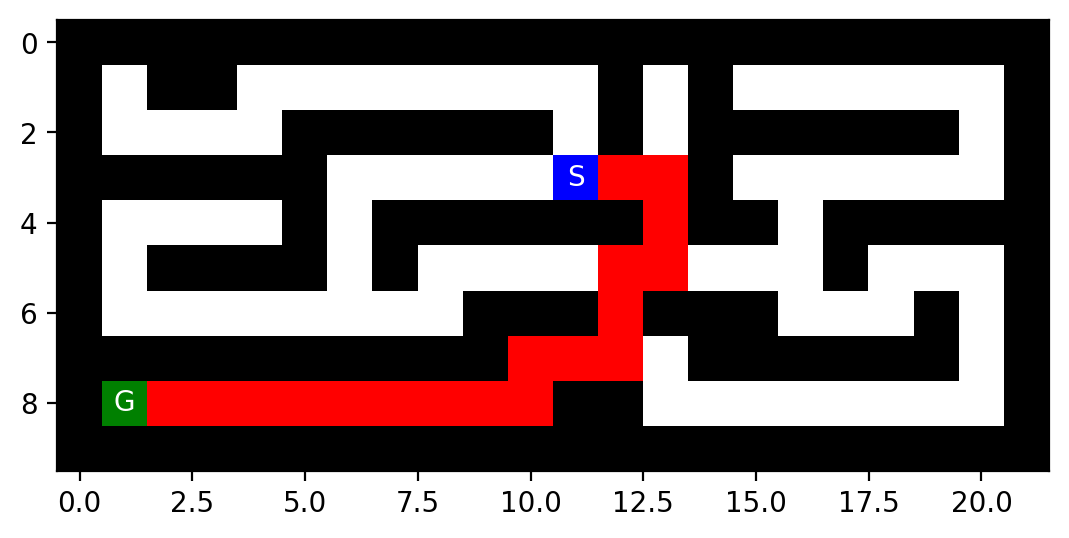

Path Cost: 19 ; Number of Nodes Expanded: 92 ; Max Tree Depth: 19 ; Max Number of Nodes in Memory: 92 ; Max Frontier Size: 9


In [656]:
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

result = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
for node in result[0]:
    if maze[node.pos] not in ["S", "G"]:
        maze[node.pos] = "P"
mh.show_maze(maze)
print('Path Cost:', result[1], '; Number of Nodes Expanded:', result[2], '; Max Tree Depth:', result[3], '; Max Number of Nodes in Memory:', result[4], '; Max Frontier Size:', result[5])

In [657]:
import copy
########### DFS ###########

def is_cycle(node):
    temp_node = copy.deepcopy(node)
    while temp_node.parent != None:
        if temp_node.parent.pos == node.pos:
            return True
        temp_node = temp_node.parent
    return False


def dfs(maze, start, goal):
    actions = {"North": (-1, 0), "South": (1, 0), "East": (0, 1), "West": (0, -1)}
    max_tree_depth = 0
    num_nodes_expanded = 0
    max_frontier_size = 0

    frontier = [Node(start, None, None, 0)]

    while frontier:
        num_nodes_expanded += 1
        current_node = frontier.pop()

        if maze[current_node.pos] == "G":
            return current_node.get_path_from_root(), current_node.cost, num_nodes_expanded, max_tree_depth, len(current_node.get_path_from_root()), max_frontier_size
        
        if not is_cycle(current_node):
            for action in actions:
                # Get neighbor position if it is not a wall
                neighbor_pos = (current_node.pos[0] + actions[action][0], current_node.pos[1] + actions[action][1])
                if mh.look(maze, neighbor_pos) != "X":
                    # Create neighbor node
                    neighbor_node = Node(neighbor_pos, current_node, action, current_node.cost + 1)
                    # Adjust max tree depth
                    if neighbor_node.cost > max_tree_depth:
                        max_tree_depth = neighbor_node.cost
                    # Check if the neighbor is already in the frontier, if so remove it and add the new one
                    for node in frontier:
                        if node.pos == neighbor_node.pos:
                            frontier.remove(node)
                    # Add neighbor to frontier
                    frontier.append(neighbor_node)
                    # Adjust max frontier size
                    if len(frontier) > max_frontier_size:
                        max_frontier_size = len(frontier)
    return None


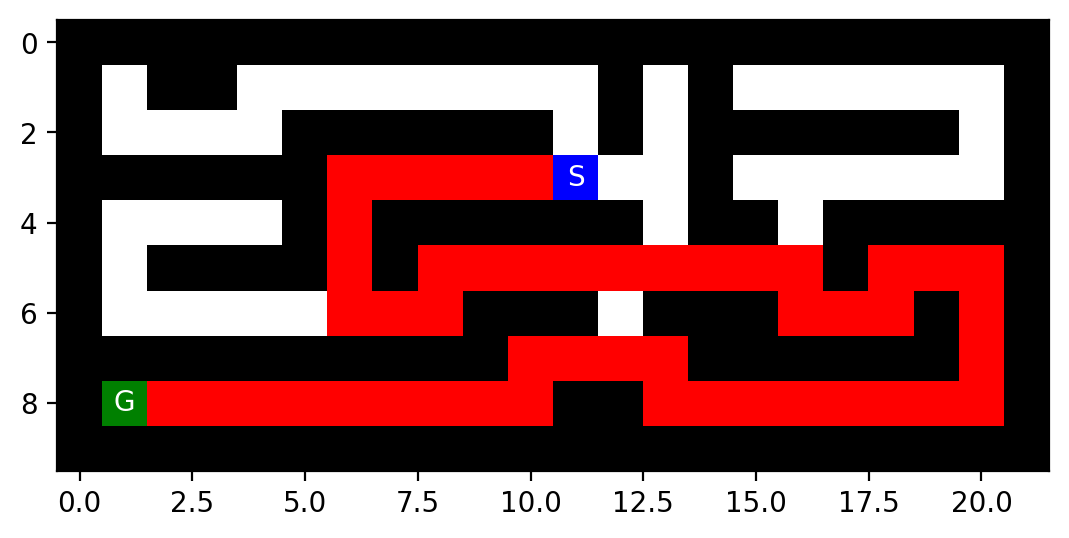

Path Cost: 49 ; Number of Nodes Expanded: 87 ; Max Tree Depth: 49 ; Max Number of Nodes in Memory: 50 ; Max Frontier Size: 37


In [658]:
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

result = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

for node in result[0]:
    if maze[node.pos] not in ["S", "G"]:
        maze[node.pos] = "P"
mh.show_maze(maze)

print('Path Cost:', result[1], '; Number of Nodes Expanded:', result[2], '; Max Tree Depth:', result[3], '; Max Number of Nodes in Memory:', result[4], '; Max Frontier Size:', result[5])

### How does BFS and DFS deal with loops (cycles)?

In BFS, it handles loops by keeping a reached data structure, which records all nodes that have been visied. This makes it easy and straigtforward to cross check potential neighbors with this list to see if they have been visited before. However, keeping this list can be memory intensive, so it is not ideal for larger mazes or in other algorithms. In the case of DFS, it does not use a reached data structure, rather it implements its own cycle checking to prevent loops. Before expanding any node, it first checks if the node is already in the current path from root to the node. If this is the case, then it does not expand the node and moves on to the next node in the frontier. The main downside of this approach is that it only references the current path rather than the entire tree, which could potentialy result in a loop if the node is in the tree but not in the current path. This is why this approach is sometimes incomplete.

### Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

The BFS implementation is both complete and optimal, since it will return the optimal path to the goal. However, it is not optimal in the sense that it takes up a lot of memory. The time complexity of BFS is $O(b^d)$ and the space complexity is $O(b^d)$, where *b* is the maximum branching factor (4) and *d* is the depth of the optimal solution. This makes the time and space complexity $O(4^d)$, depending on the size of the maze.

The DFS implementation is complete, but not optimal, since it returns the first path it finds to the goal, which may or may not be the optimal path. It is complete because it will return a path to the goal if one exists. The time complexity of DFS is $O(b^m)$, which could be the time to reach a solution at max depth *m* with a maximum branching factor of *b* (4). The space complexity is $O(bm)$, since it will only store the path from the root to the current node. This makes the time complexity $O(4^m)$ and the space complexity $O(4m)$, depending on the size of the maze.


## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [659]:
######## Greedy BFS ########

def distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def gbfs(maze, start, goal):
    actions = {"North": (-1, 0), "South": (1, 0), "East": (0, 1), "West": (0, -1)}
    max_tree_depth = 0
    num_nodes_expanded = 0
    max_frontier_size = 0

    current_node = Node(start, None, None, 0)

    if current_node.pos == goal:
        return current_node.get_path_from_root(), current_node.cost, num_nodes_expanded, max_tree_depth, len(reached), max_frontier_size
    frontier = [current_node]
    reached = [current_node.pos]
    while frontier:
        frontier.sort(key=lambda x: distance(x.pos, goal))
        num_nodes_expanded += 1
        current_node = frontier.pop(0)
        
        # Sort the possible actions based on distance from the goal
        sorted_actions = []
        for action in actions:
            neighbor_pos = (current_node.pos[0] + actions[action][0], current_node.pos[1] + actions[action][1])
            sorted_actions.append((action, distance(neighbor_pos, goal)))
            # Sort the actions according to the distance
            sorted_actions.sort(key=lambda x: x[1])

        for action in sorted_actions:
            neighbor_pos = (current_node.pos[0] + actions[action[0]][0], current_node.pos[1] + actions[action[0]][1])
            # Check if the position is already reached or is a wall
            if neighbor_pos in reached or mh.look(maze, neighbor_pos) == "X":
                continue
            # Create neighbor node
            neighbor_node = Node(neighbor_pos, current_node, action[0], current_node.cost + 1)
            # Adjust max tree depth
            if neighbor_node.cost > max_tree_depth:
                max_tree_depth = neighbor_node.cost
            # Check if neighbor is goal
            if neighbor_pos == goal:
                return neighbor_node.get_path_from_root(), neighbor_node.cost, len(reached)-1, max_tree_depth, len(reached), max_frontier_size
            # Add neighbor to reached and frontier
            reached.append(neighbor_pos)
            frontier.append(neighbor_node)
            # Adjust max frontier size
            if frontier.__len__() > max_frontier_size:
                max_frontier_size = frontier.__len__()
    return None

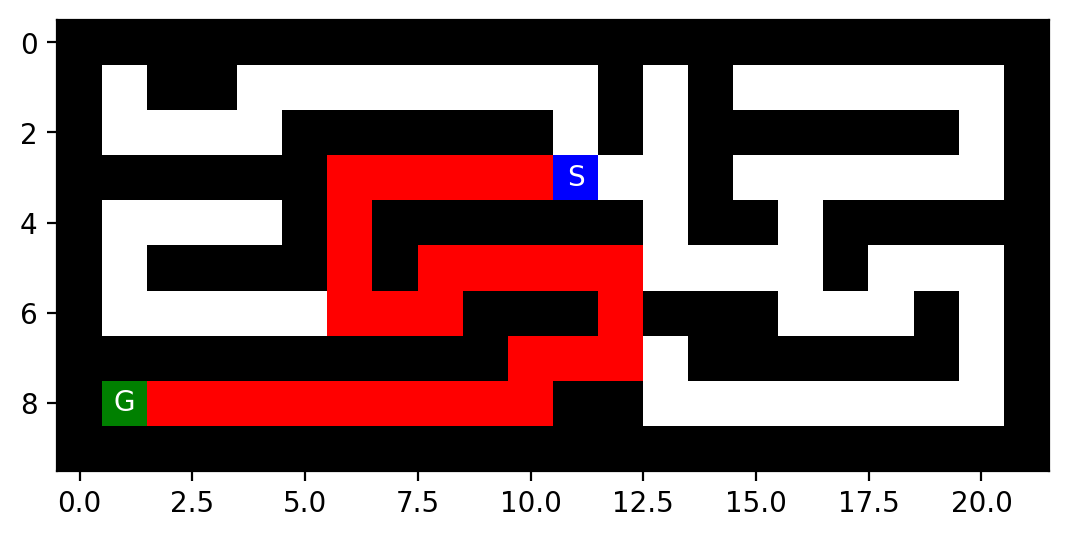

Path Cost: 29 ; Number of Nodes Expanded: 42 ; Max Tree Depth: 29 ; Max Number of Nodes in Memory: 43 ; Max Frontier Size: 5


In [660]:
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

result = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
for node in result[0]:
    if maze[node.pos] not in ["S", "G"]:
        maze[node.pos] = "P"
mh.show_maze(maze)
print('Path Cost:', result[1], '; Number of Nodes Expanded:', result[2], '; Max Tree Depth:', result[3], '; Max Number of Nodes in Memory:', result[4], '; Max Frontier Size:', result[5])

In [661]:
######## A* ########

def a_star(maze, goal, start):
    actions = {"North": (-1, 0), "West": (0, -1), "South": (1, 0), "East": (0, 1)}
    max_tree_depth = 0
    num_nodes_expanded = 0
    max_frontier_size = 0
    # Set the current node as the start node
    current_node = Node(start, None, None, 0)

    frontier = [current_node]
    reached = {current_node.pos: current_node}
    while frontier:
        frontier.sort(key=lambda x: x.cost + distance(x.pos, goal))
        num_nodes_expanded += 1
        current_node = frontier.pop(0)
        if current_node.pos == goal:
            return current_node.get_path_from_root(), current_node.cost, num_nodes_expanded, max_tree_depth, len(reached), max_frontier_size    
        
        for action in actions:
            # Get neighbor position if it is not a wall
            neighbor_pos = (current_node.pos[0] + actions[action][0], current_node.pos[1] + actions[action][1])
            if mh.look(maze, neighbor_pos) != "X":
                # Create neighbor node
                neighbor_node = Node(neighbor_pos, current_node, action, current_node.cost + 1)
                # Adjust max tree depth
                if neighbor_node.cost > max_tree_depth:
                    max_tree_depth = neighbor_node.cost
                if (neighbor_node.pos not in reached) or neighbor_node.cost < reached[neighbor_node.pos].cost:
                    # Add neighbor to reached and frontier
                    reached[neighbor_pos] = neighbor_node
                    frontier.append(neighbor_node)
                    # Adjust max frontier size
                    if len(frontier) > max_frontier_size:
                        max_frontier_size = len(frontier)
    return None 
    

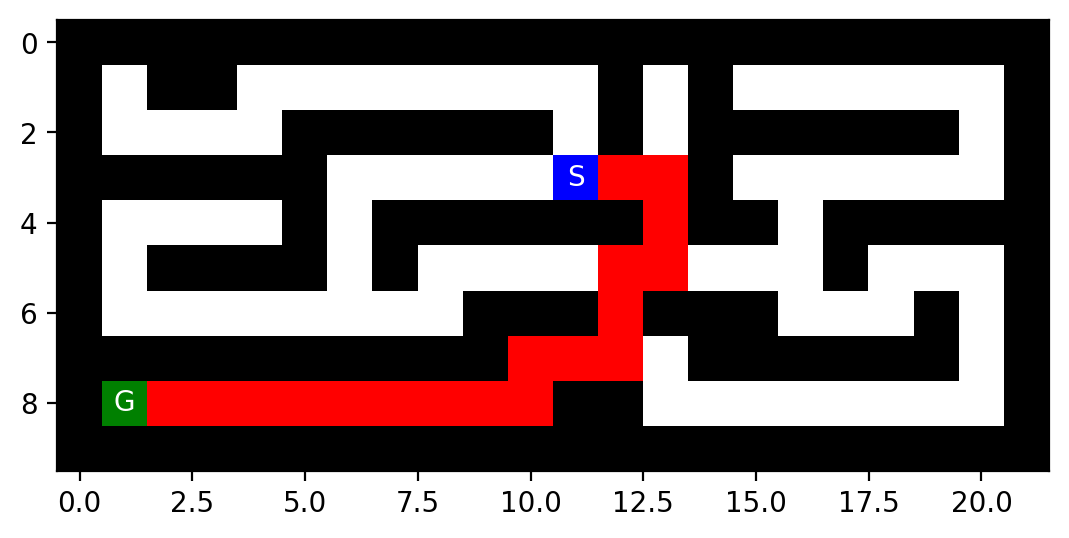

Path Cost: 19 ; Number of Nodes Expanded: 23 ; Max Tree Depth: 19 ; Max Number of Nodes in Memory: 27 ; Max Frontier Size: 5


In [662]:
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

result = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
for node in result[0]:
    if maze[node.pos] not in ["S", "G"]:
        maze[node.pos] = "P"
mh.show_maze(maze)
print('Path Cost:', result[1], '; Number of Nodes Expanded:', result[2], '; Max Tree Depth:', result[3], '; Max Number of Nodes in Memory:', result[4], '; Max Frontier Size:', result[5])

### Are your implementations complete and optimal? What is the time and space complexity?

As stated before, *b* is the maximum branching factor and *d* is the depth of the optimal solution.

In the GBFS implementation, it is complete since it will find a solution, but it is not optimal since it is not guarenteed to find the optimal path. The time complexity in the worst case is $O(b^m)$, similar to DFS, but in the best case it is $O(bm)$ if the heuristic value is accurate. Since the maximum branching factor is stil 4, the complexity is $O(4^m)$ or $O(4m)$ (worst/best), depending on the size of the maze. The space complexity is the same as the time complexity, since it will only store the path from the root to the current node.

In the A* implementation, it is both complete and optimal. It is complete since it will find a solution if one exists, and it is optimal since it will find the optimal path. The worst case time complexity is $O(b^d)$, or $O(4^d)$, similar to BFS, although it also depends on the type of heuristic function used. The space complexity is also the same as time complexity, since it still will only store the path from the root to the current node.

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

### Helper Functions

In [663]:
import matplotlib.pyplot as plt

# Display chart of results (helper function)
def plot_results(results, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_xticks(range(4))
    ax.set_xticklabels(results['Algorithm'])
    ax.grid(True)
    ax.plot(results['Number of Nodes Expanded'], label='Number of Nodes Expanded')
    ax.plot(results['Max Tree Depth'], label='Max Tree Depth')
    ax.plot(results['Max Nodes in Memory'], label='Max Nodes in Memory')
    ax.plot(results['Max Frontier Size'], label='Max Frontier Size')
    ax.legend()
    plt.show()

In [664]:
import pandas as pd

# Create table of results (helper function)
def make_table(result1, result2, result3, result4):
    table = pd.DataFrame(columns=['Algorithm', 'Path Cost', 'Number of Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Memory', 'Max Frontier Size'])
    table['Algorithm'] = ['BFS', 'DFS', 'GBFS', 'A*']
    table['Path Cost'] = [result1[1], result2[1], result3[1], result4[1]]
    table['Number of Nodes Expanded'] = [result1[2], result2[2], result3[2], result4[2]]
    table['Max Tree Depth'] = [result1[3], result2[3], result3[3], result4[3]]
    table['Max Nodes in Memory'] = [result1[4], result2[4], result3[4], result4[4]]
    table['Max Frontier Size'] = [result1[5], result2[5], result3[5], result4[5]]
    return table

### Small Maze

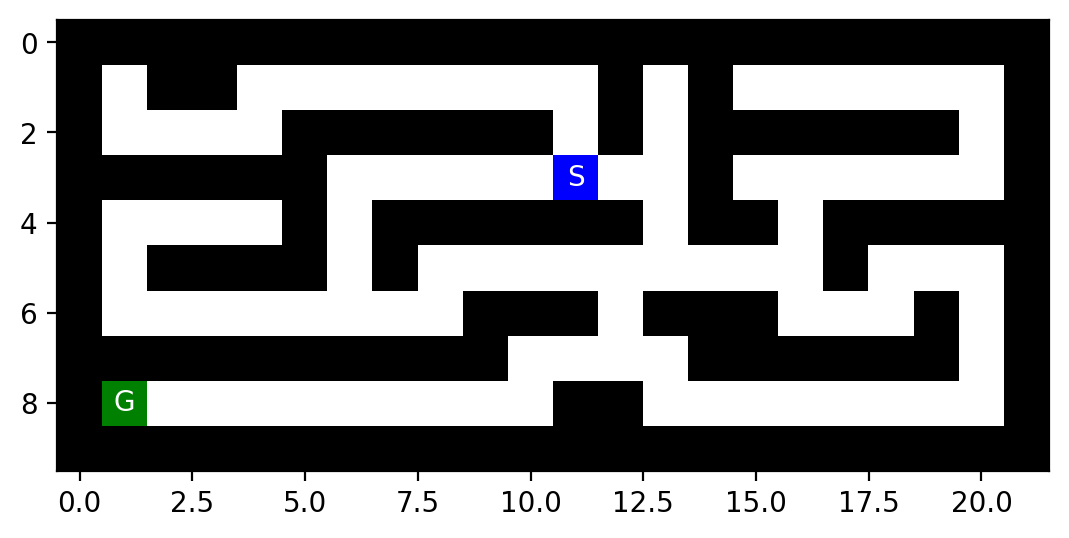

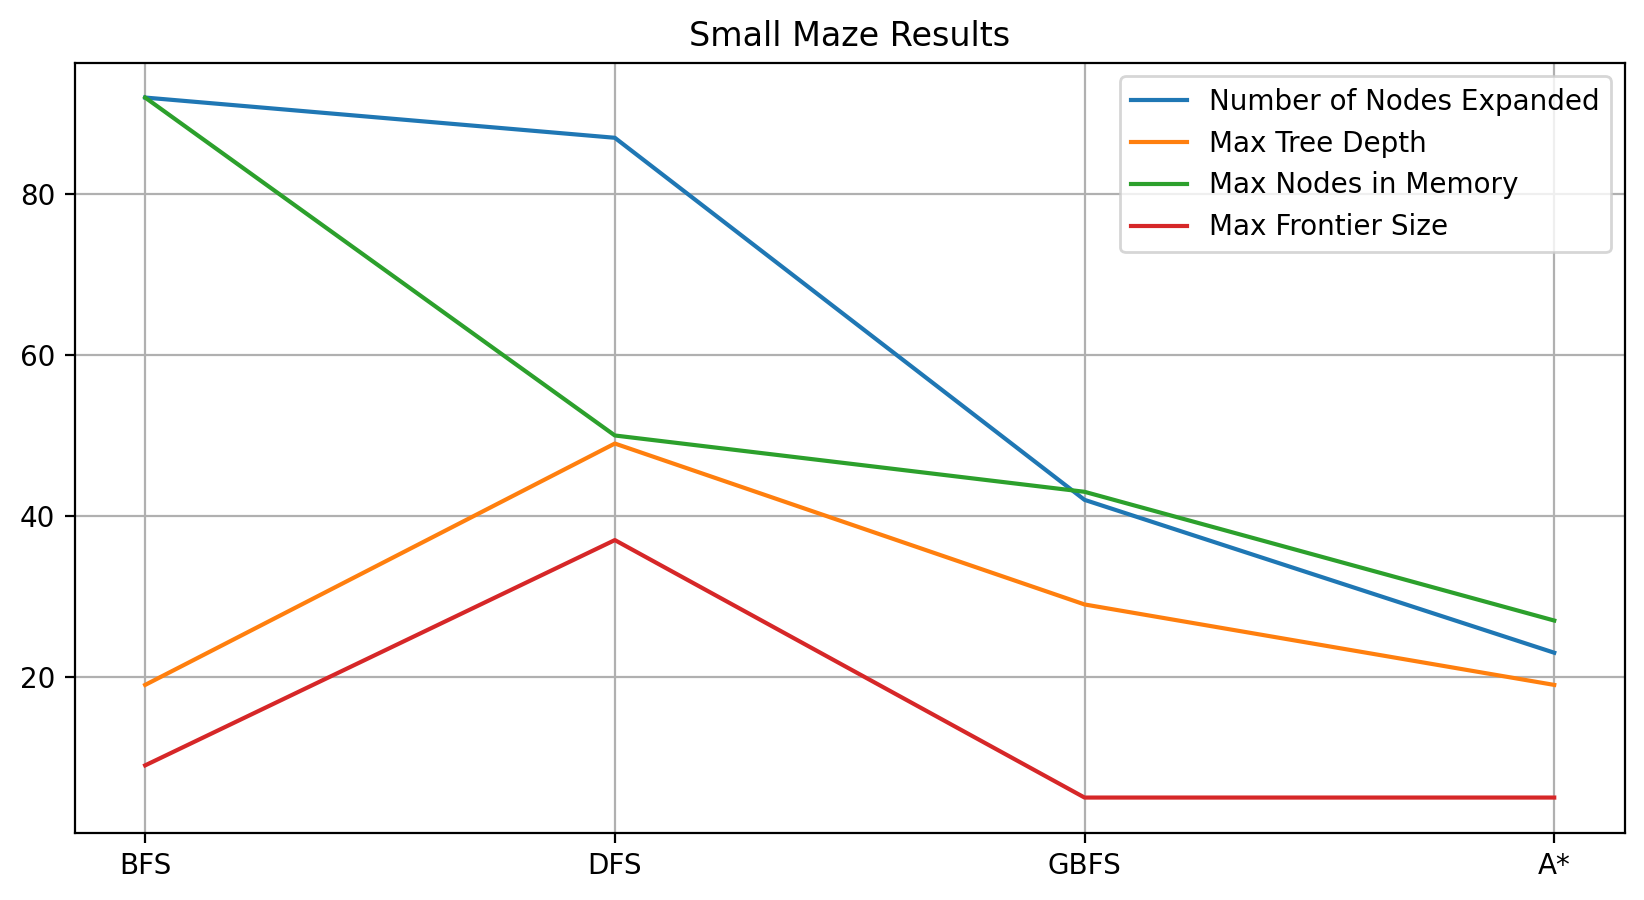

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,19,92,19,92,9
1,DFS,49,87,49,50,37
2,GBFS,29,42,29,43,5
3,A*,19,23,19,27,5


In [665]:
# SMALL MAZE
with open("./mazes/small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Small Maze Results')
table

### Medium Maze

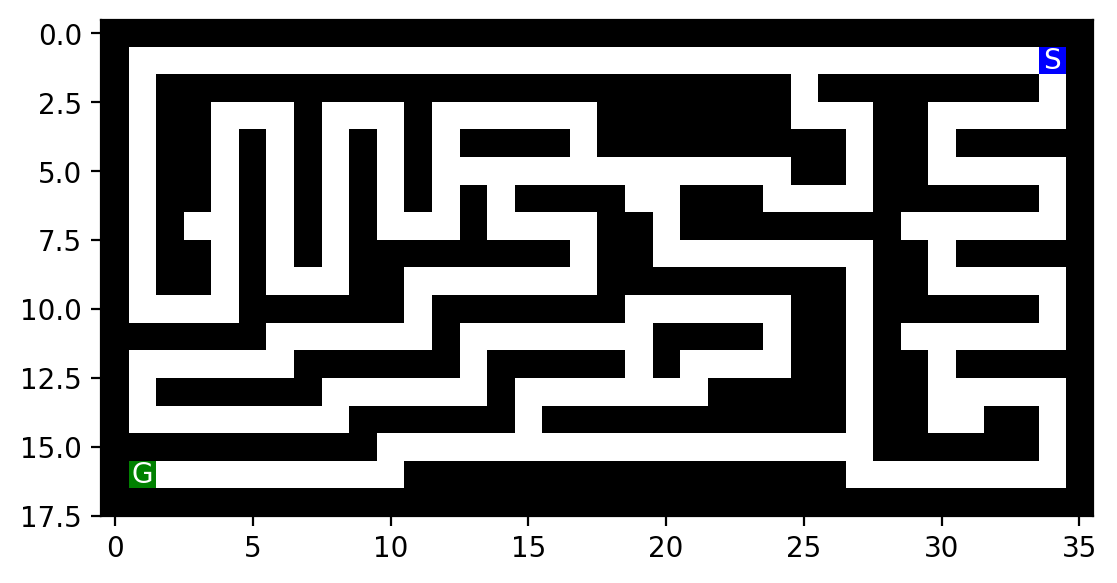

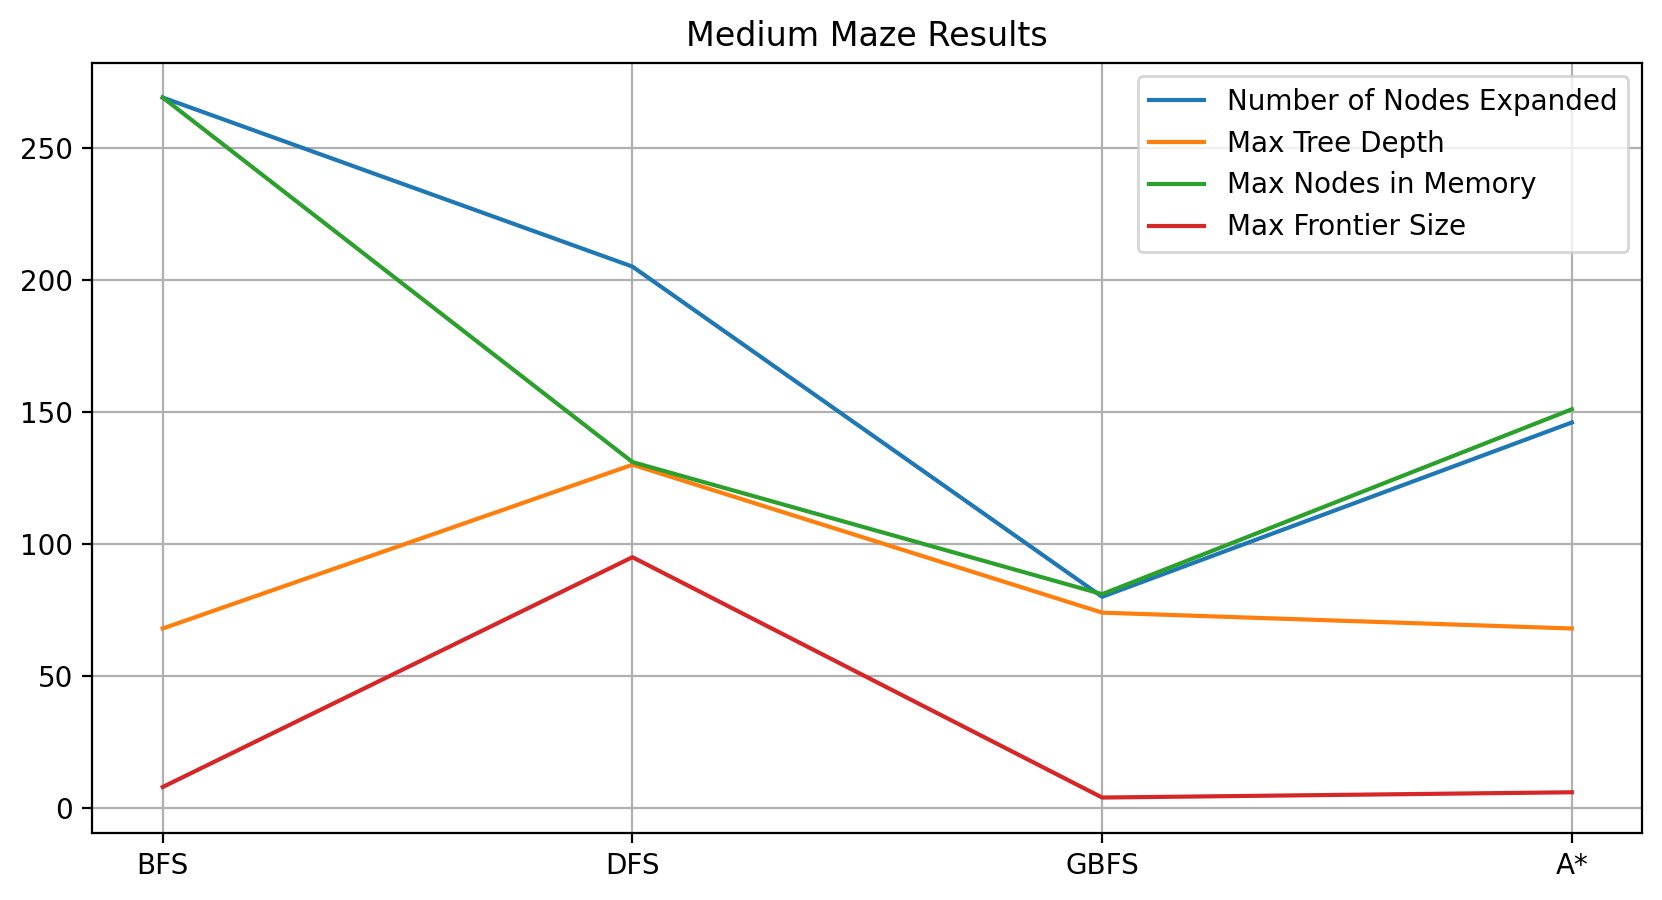

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,68,269,68,269,8
1,DFS,130,205,130,131,95
2,GBFS,74,80,74,81,4
3,A*,68,146,68,151,6


In [666]:
# MEDIUM MAZE
with open("./mazes/medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Medium Maze Results')
table

### Large Maze

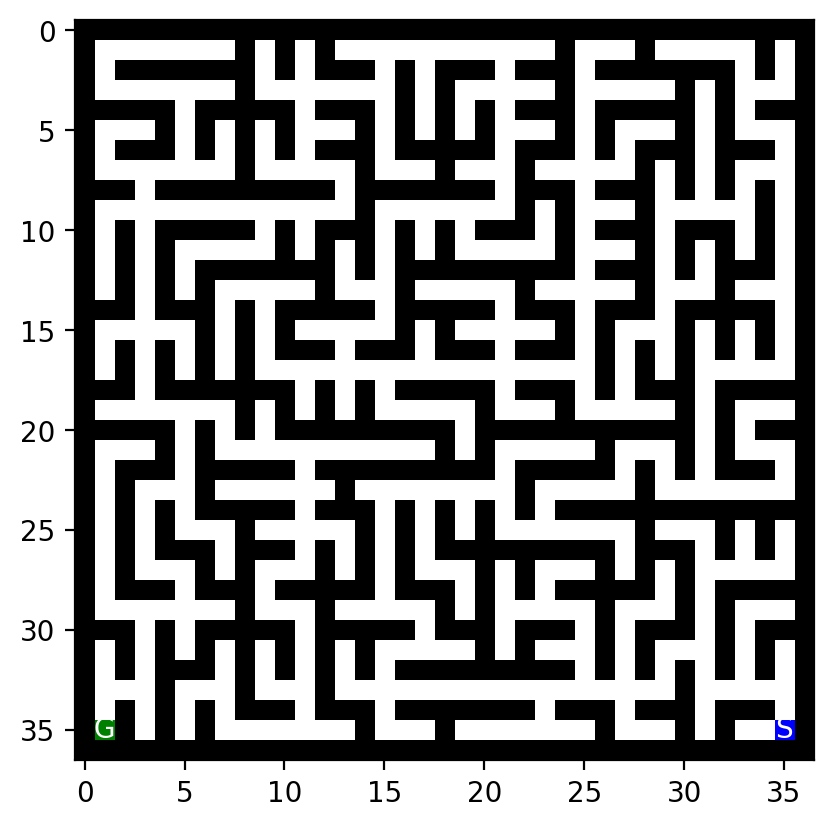

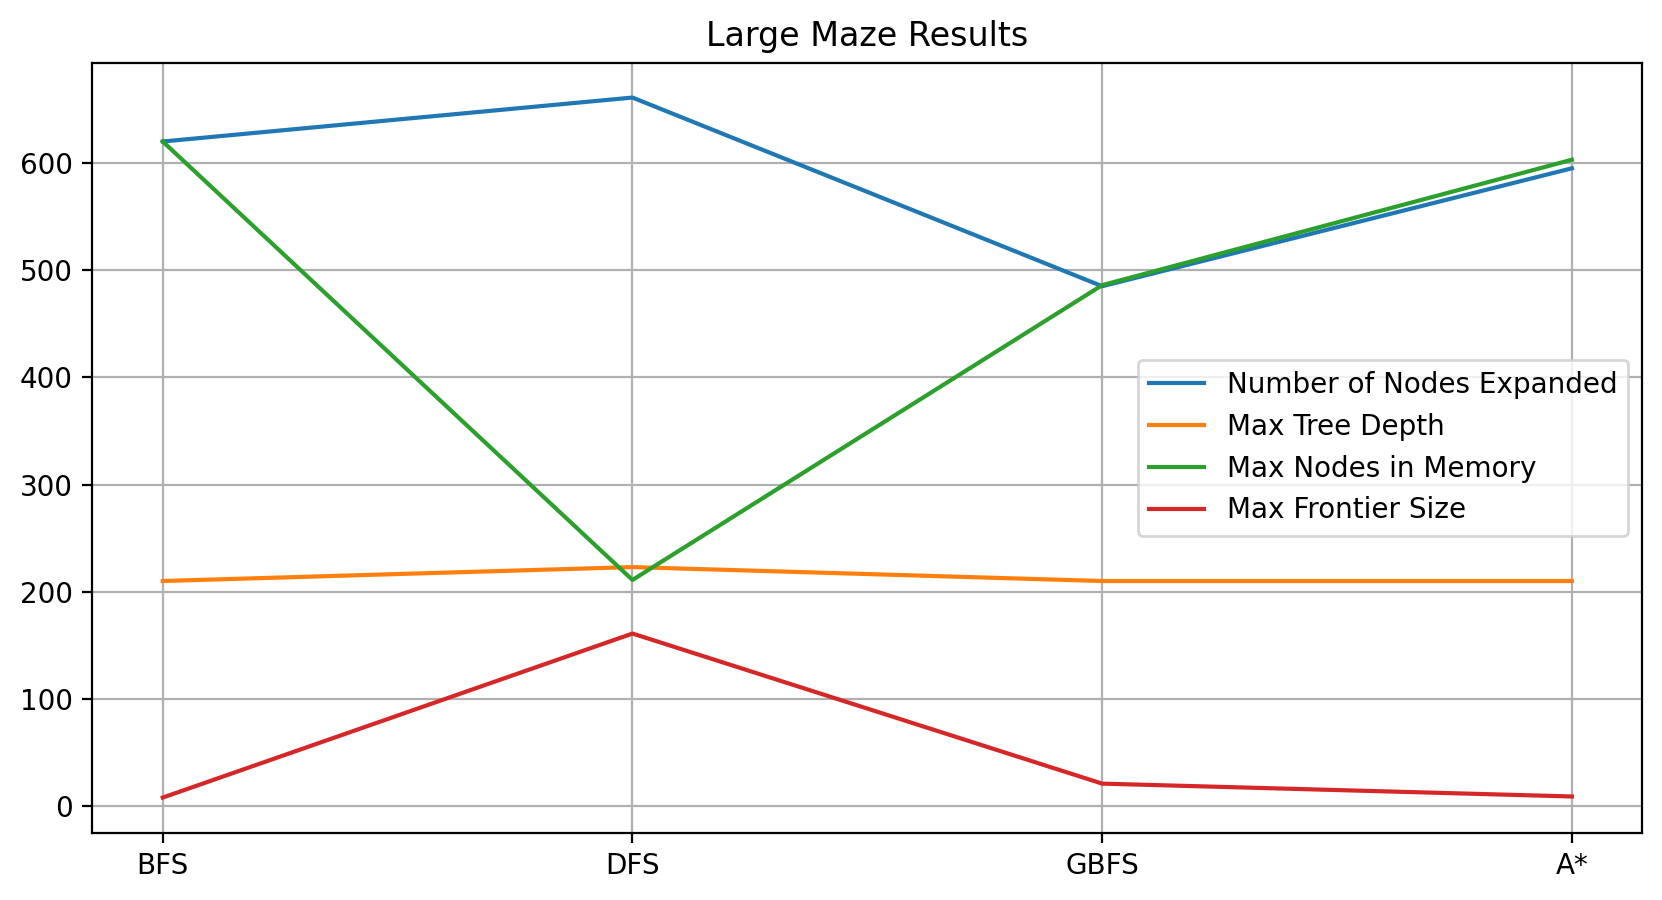

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,210,620,210,620,8
1,DFS,210,661,223,211,161
2,GBFS,210,485,210,486,21
3,A*,210,595,210,603,9


In [667]:
# LARGE MAZE
with open("./mazes/large_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Large Maze Results')
table

### Wall Maze

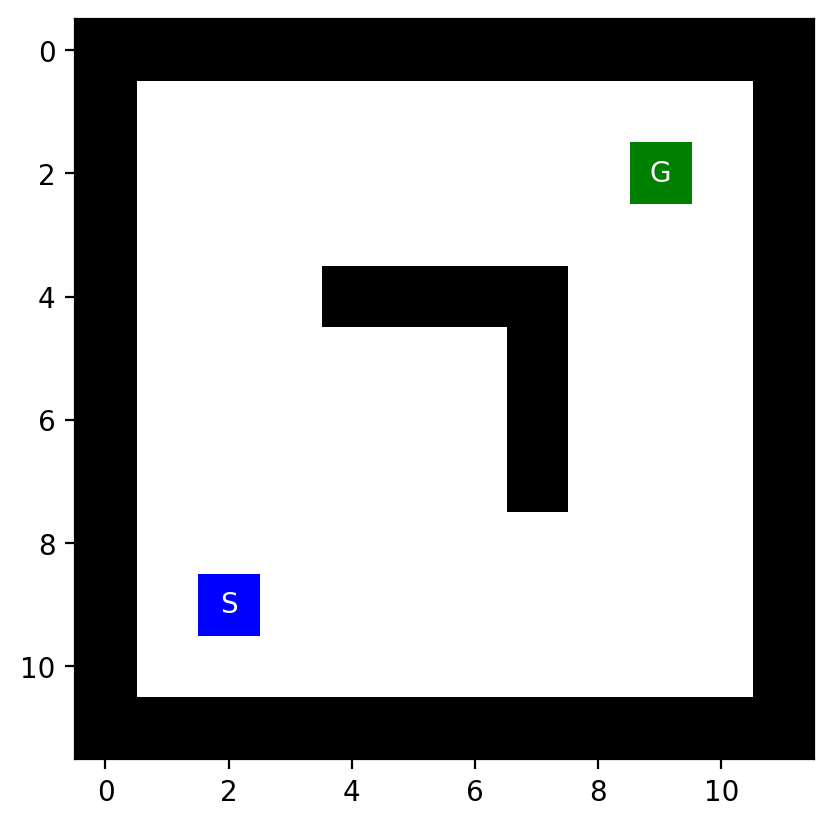

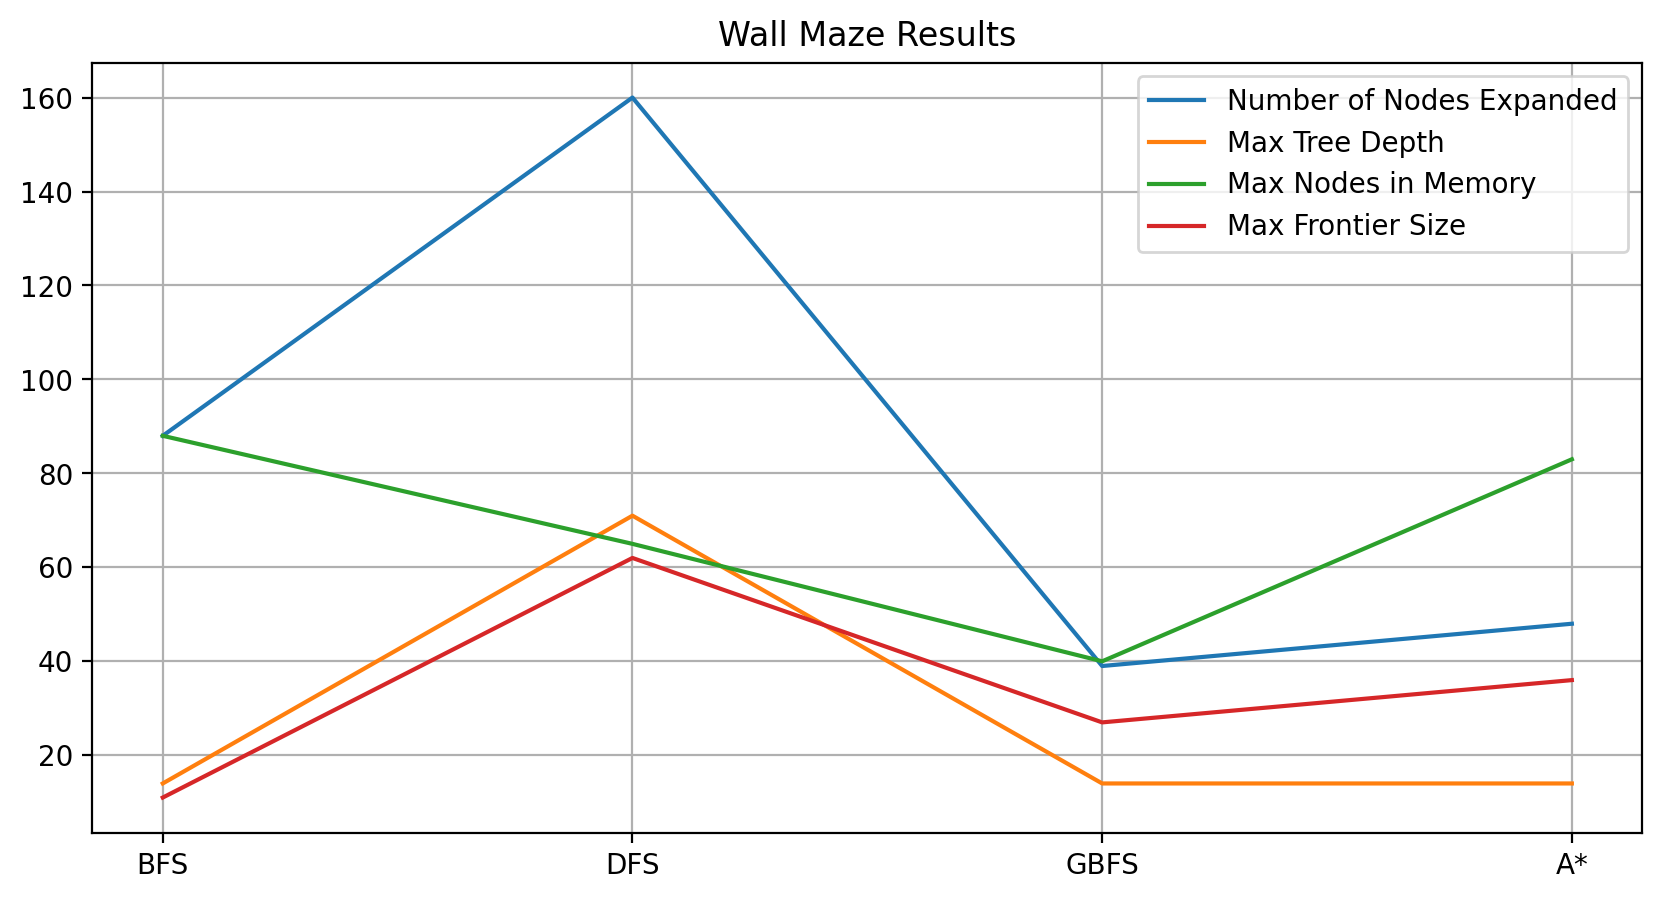

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,14,88,14,88,11
1,DFS,64,160,71,65,62
2,GBFS,14,39,14,40,27
3,A*,14,48,14,83,36


In [668]:
# WALL MAZE
with open("./mazes/wall_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Wall Maze Results')
table

### Open Maze

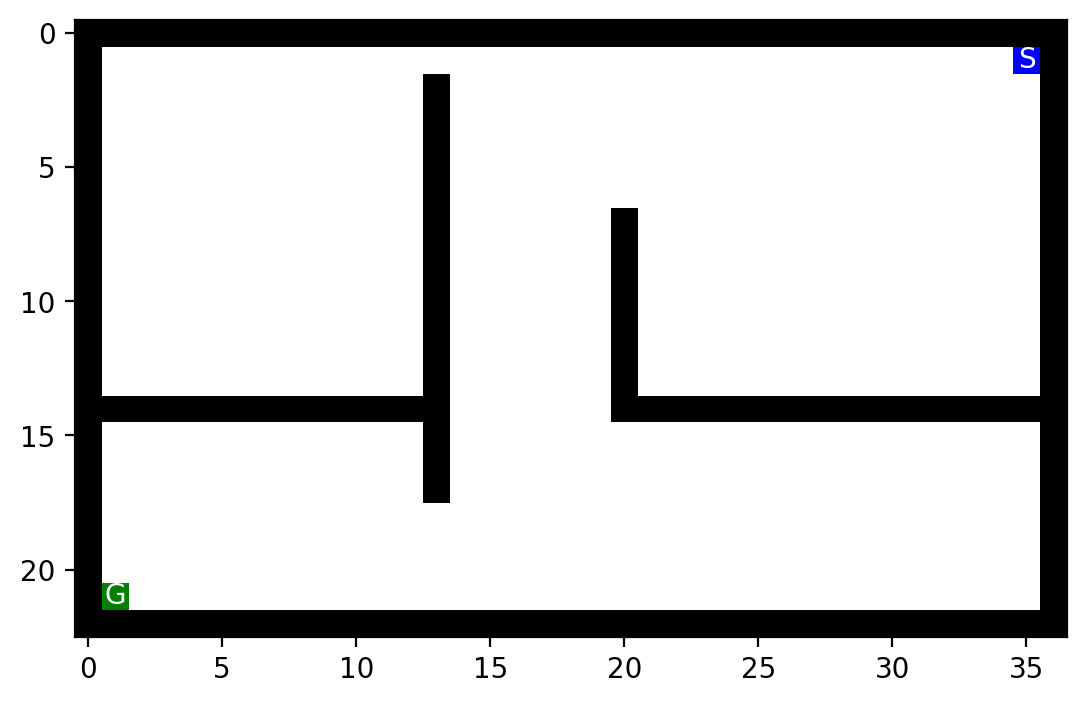

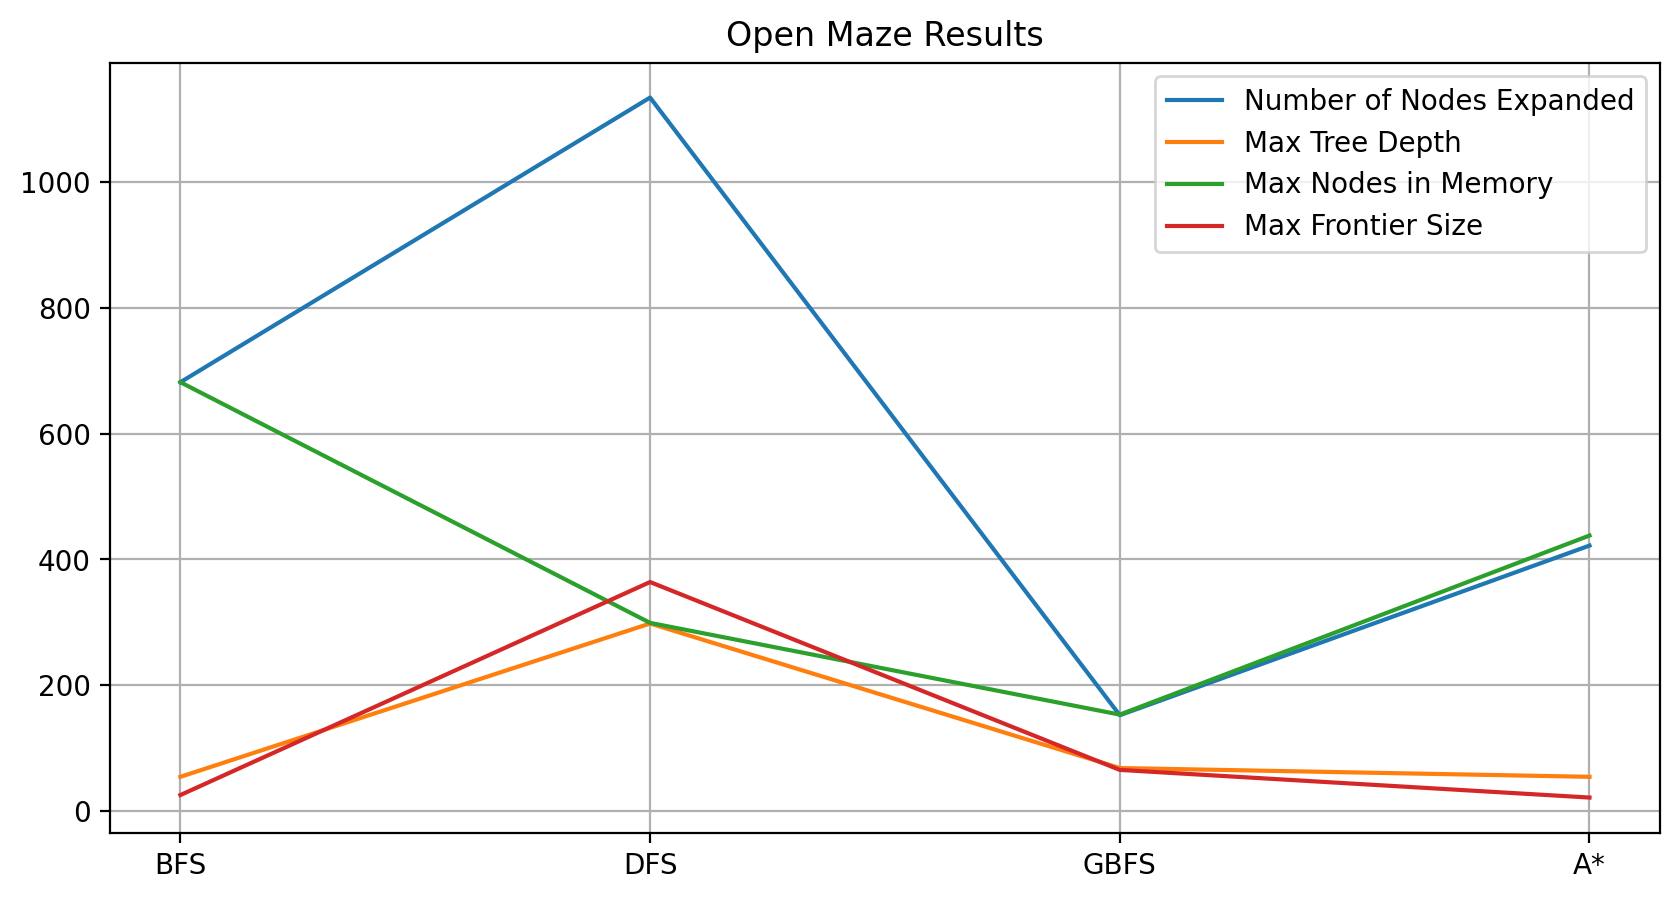

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,54,682,54,682,25
1,DFS,298,1135,298,299,364
2,GBFS,68,152,68,153,65
3,A*,54,422,54,438,21


In [669]:
# OPEN MAZE
with open("./mazes/open_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Open Maze Results')
table

### Loops Maze

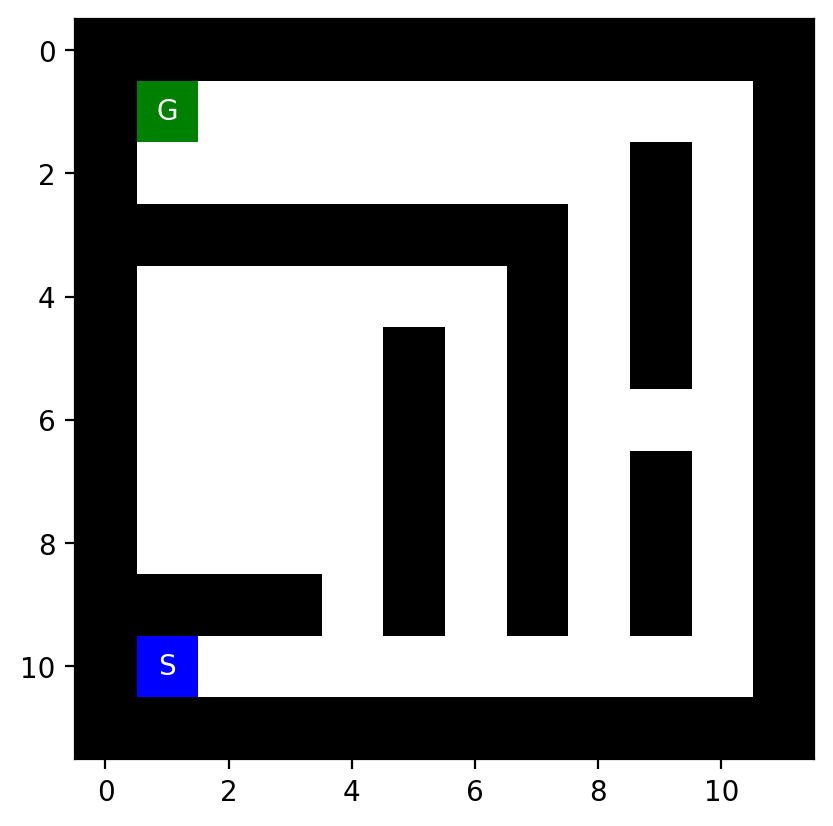

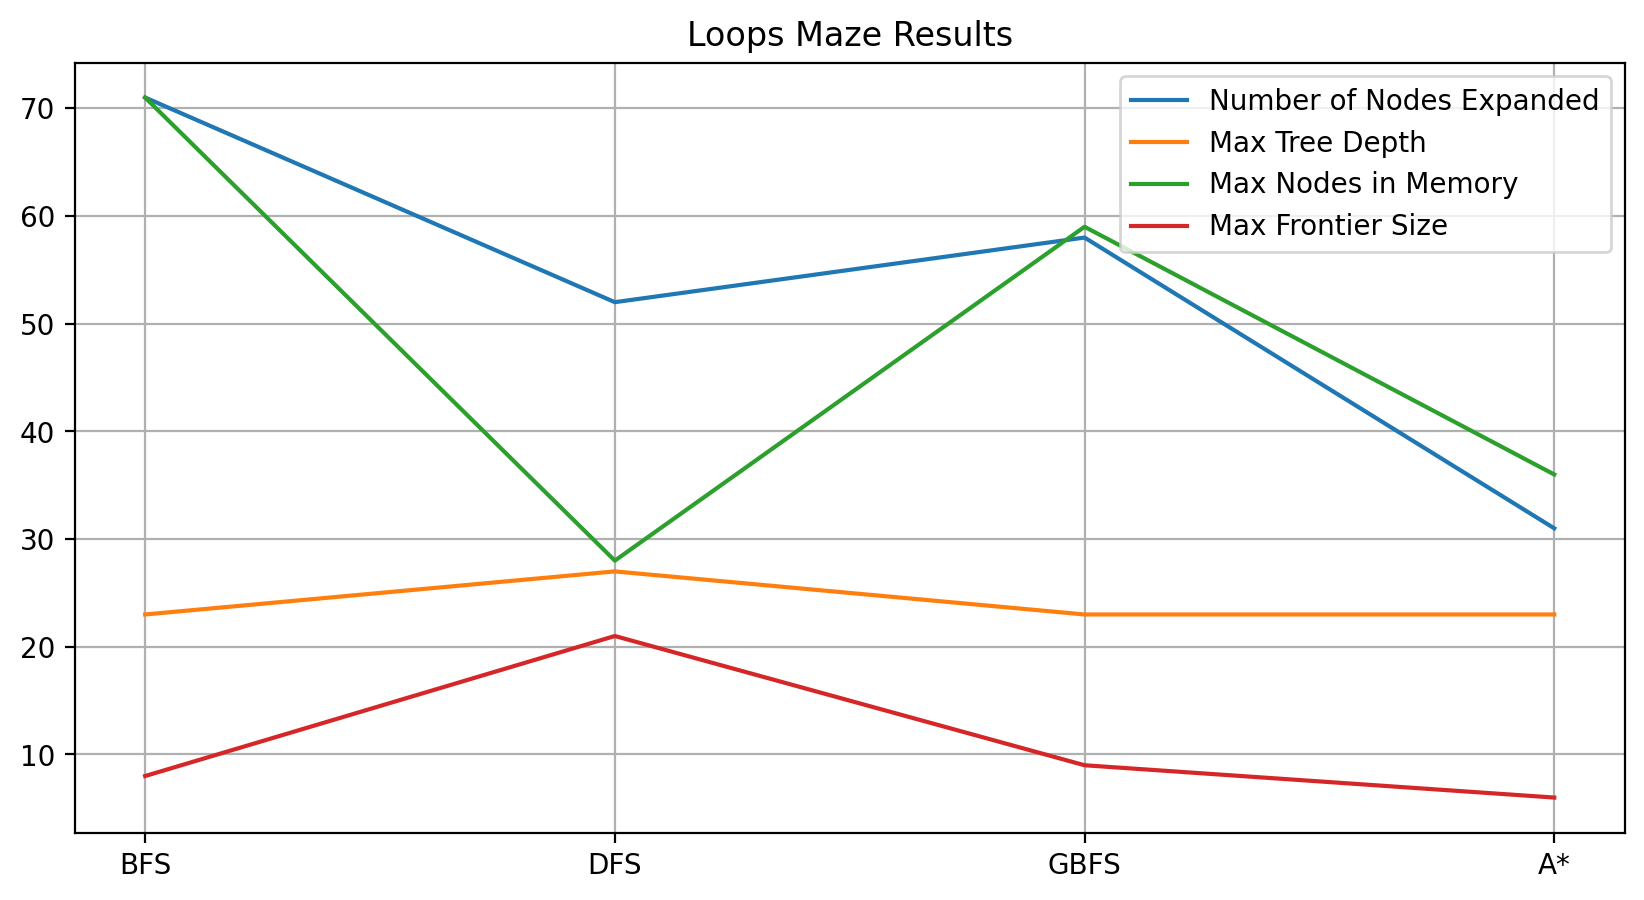

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,23,71,23,71,8
1,DFS,27,52,27,28,21
2,GBFS,23,58,23,59,9
3,A*,23,31,23,36,6


In [670]:
# LOOPS MAZE
with open("./mazes/loops_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Loops Maze Results')
table

### Empty Maze

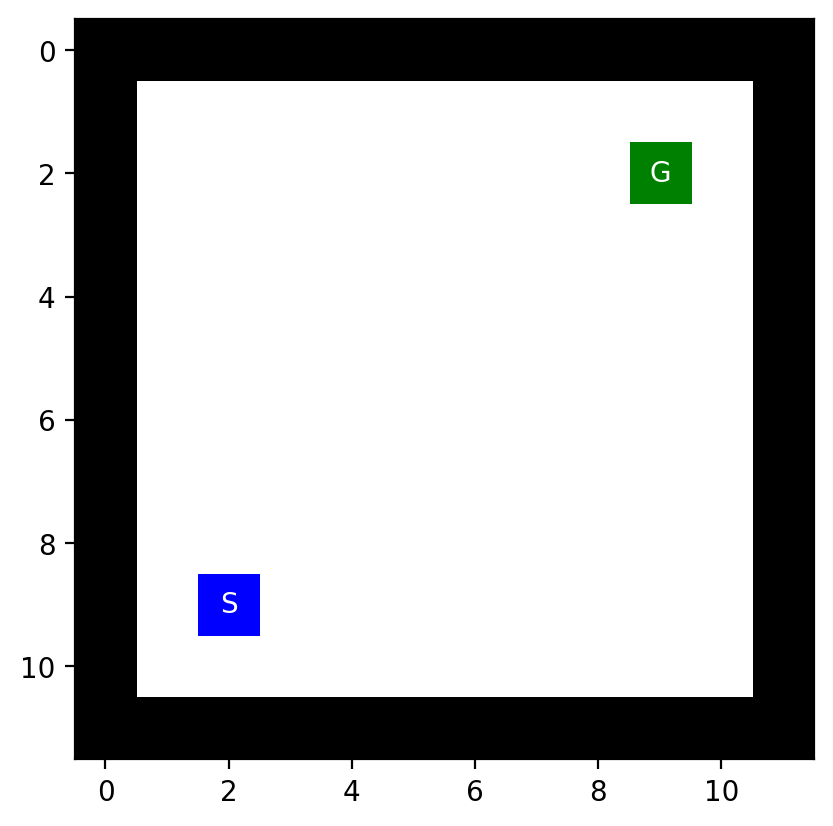

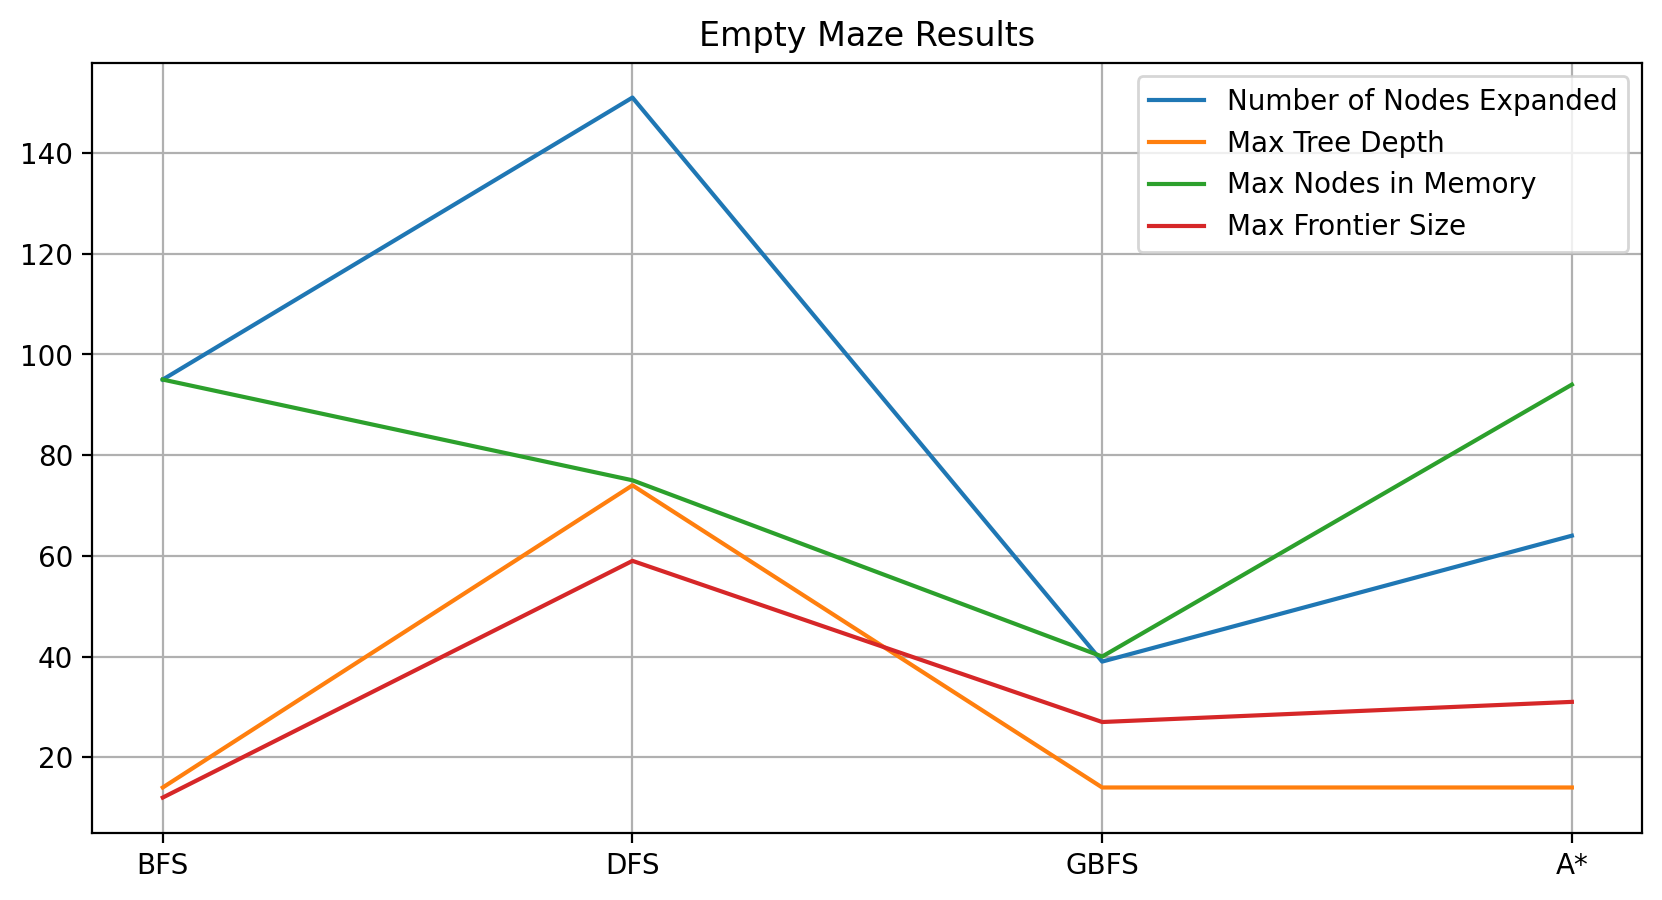

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,14,95,14,95,12
1,DFS,74,151,74,75,59
2,GBFS,14,39,14,40,27
3,A*,14,64,14,94,31


In [671]:
# EMPTY MAZE
with open("./mazes/empty_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Empty Maze Results')
table

### Empty_2 Maze

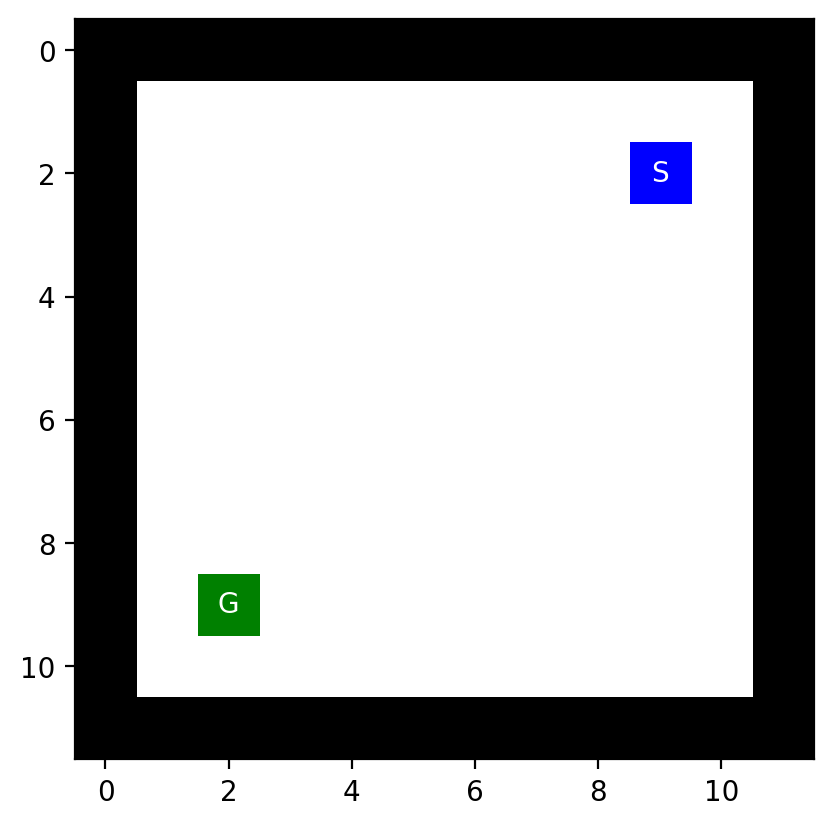

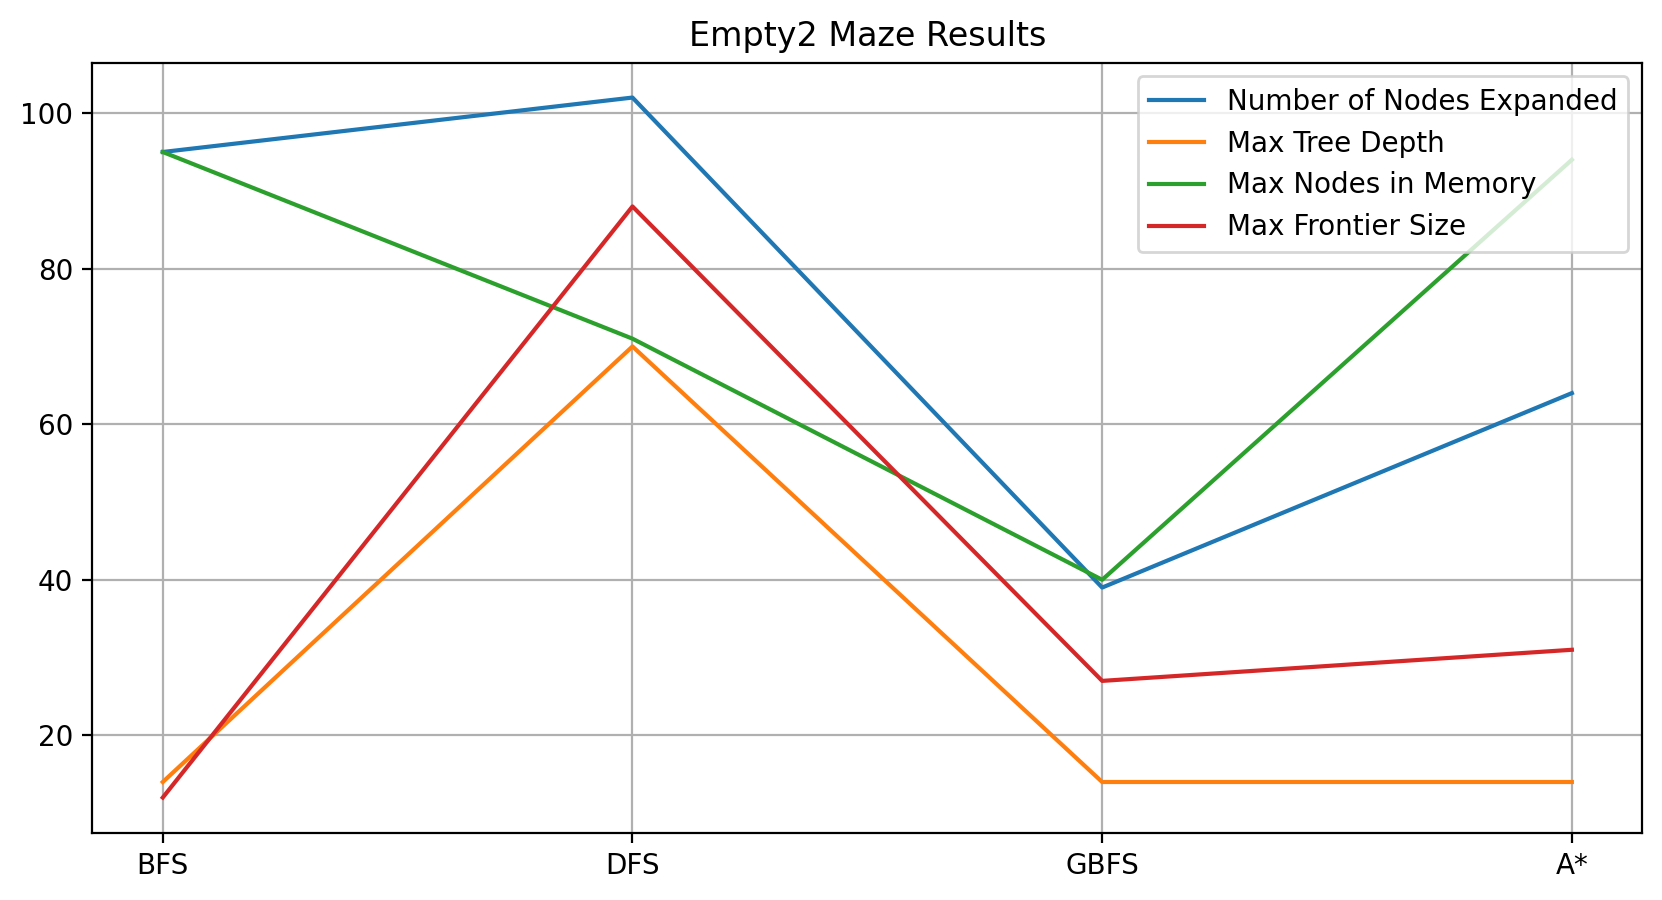

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Nodes in Memory,Max Frontier Size
0,BFS,14,95,14,95,12
1,DFS,70,102,70,71,88
2,GBFS,14,39,14,40,27
3,A*,14,64,14,94,31


In [672]:
# EMPTY_2 MAZE
with open("./mazes/empty_2_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Get the result of each of the search algorithms
result1 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = gbfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result4 = a_star(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = make_table(result1, result2, result3, result4)
plot_results(table, 'Empty2 Maze Results')
table

### Discuss the most important lessons you have learned from implementing the different search strategies.

In general across most of the mazes, DFS tends to have a higher number of nodes expanded, maximum tree depth, and maximum frontier size compared to all the other algorithms. This is most likely due to the fact that it will expand all the nodes in the current path before moving on to the next node in the frontier. In all the mazes used here, except for the large maze, DFS does not find the optimal path, however, in a lot of the mazes it has a lower number of nodes in memory compared to some of the other algorithms. For example, in the large maze, they all return a path cost of 210, but in DFS it has the lowest number of nodes in memory. 

There also appears to be a pattern in around half of the mazes GBFS has lower values for each of the features recorded compared to the other algorithms. However, in the cases where it is not the lowest, it has similar values to A* search. This could be due to the fact that both use some sort of heuristic function.

It's also worth noting that both BFS and A* find the optimal path in all mazes, which is due to the fact that they are both complete and optimal. However, BFS tends to have a higher number of nodes expanded compared to A*. This is most likely due to the fact that BFS does not use any heuristic function, so it will expand all the nodes in the frontier before moving on to the next node in no particular order. A* on the other hand uses a heuristic function, so it will expand the nodes in the frontier that are closest to the goal state and have the lowest cost from the start position. In other features they have similar values across mazes, such as max frontier size and max tree dpeth, since they both function very similar, except for the heuristic function. 

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS).

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [673]:
def is_cycle(node):
    temp_node = node
    while temp_node.parent != None:
        if temp_node.parent.pos == node.pos:
            return True
        temp_node = temp_node.parent
    return False

def ids(maze, start, goal):
    for depth in range(0,100):
        result = dfs2(maze, start, goal, depth)
        if result != None:
            return result

def dfs2(maze, start, goal, depth):
    actions = {"North": (-1, 0), "South": (1, 0), "East": (0, 1), "West": (0, -1)}
    max_tree_depth = 0
    num_nodes_expanded = 0
    max_frontier_size = 0
    frontier = [Node(start, None, None, 0)]
    

    while frontier:
        num_nodes_expanded += 1
        current_node = frontier.pop()

        if maze[current_node.pos] == "G":
            return current_node.get_path_from_root(), current_node.cost, num_nodes_expanded, max_tree_depth, len(current_node.get_path_from_root()), max_frontier_size
        
        if current_node.cost > depth:
            continue

        elif not is_cycle(current_node):
            for action in actions:
                neighbor_pos = (current_node.pos[0] + actions[action][0], current_node.pos[1] + actions[action][1])
                if mh.look(maze, neighbor_pos) == "X":
                    continue
                neighbor_node = Node(neighbor_pos, current_node, action, current_node.cost + 1)
                # Adjust max tree depth
                if neighbor_node.cost > max_tree_depth:
                    max_tree_depth = neighbor_node.cost
                 # Check if the neighbor is already in the frontier, if so remove it and add the new one
                for node in frontier:
                    if node.pos == neighbor_node.pos:
                        frontier.remove(node)
                frontier.append(neighbor_node)
                # Adjust max frontier size
                if len(frontier) > max_frontier_size:
                    max_frontier_size = len(frontier)
    return None

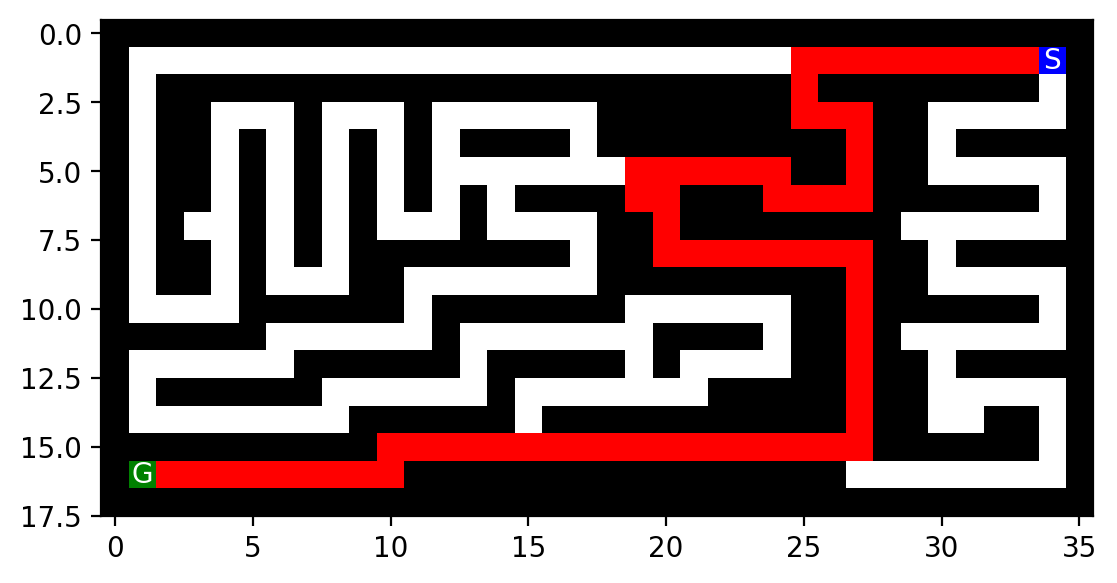

Path Cost: 70 ; Number of Nodes Expanded: 394 ; Max Tree Depth: 70 ; Max Number of Nodes in Memory: 71 ; Max Frontier Size: 60


In [674]:
with open("./mazes/medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

result = ids(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
for node in result[0]:
    if maze[node.pos] not in ["S", "G"]:
        maze[node.pos] = "P"
mh.show_maze(maze)

print('Path Cost:', result[1], '; Number of Nodes Expanded:', result[2], '; Max Tree Depth:', result[3], '; Max Number of Nodes in Memory:', result[4], '; Max Frontier Size:', result[5])

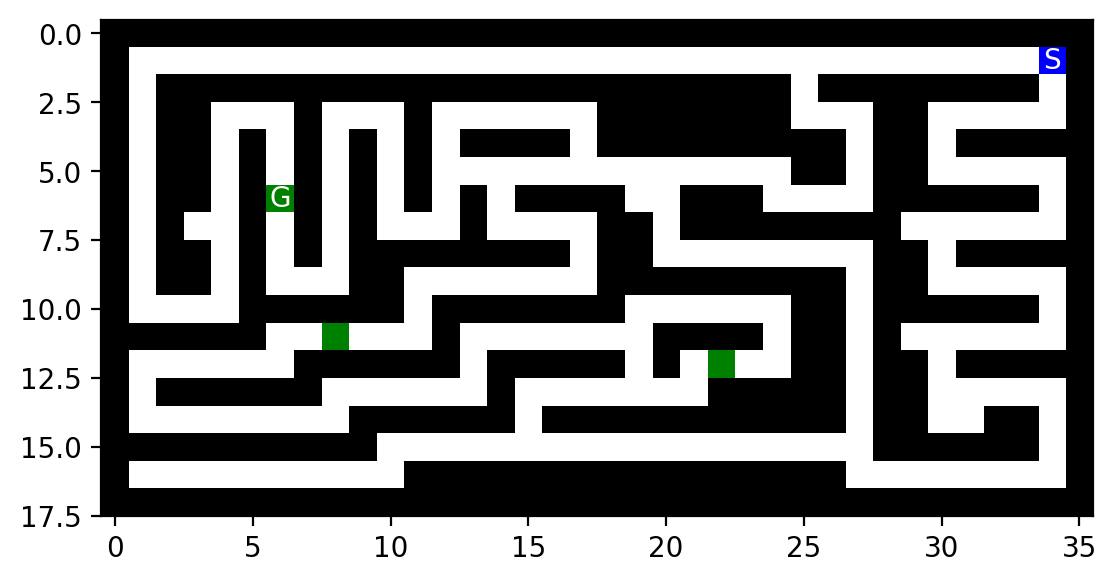

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Frontier Size,Goal Position
0,IDS,48,187,48,45,"(11, 8)"
1,DFS,57,72,57,47,"(6, 6)"
2,BFS,48,186,48,8,"(11, 8)"


In [675]:
### Medium 1 Maze
with open("./mazes/medium_1_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

result1 = ids(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = pd.DataFrame(columns=['Algorithm', 'Path Cost', 'Number of Nodes Expanded', 'Max Tree Depth', 'Max Frontier Size', 'Goal Position'])
table['Algorithm'] = ['IDS', 'DFS', 'BFS']
table['Path Cost'] = [result1[1], result2[1], result3[1]]
table['Number of Nodes Expanded'] = [result1[2], result2[2], result3[2]]
table['Max Tree Depth'] = [result1[3], result2[3], result3[3]]
table['Max Frontier Size'] = [result1[5], result2[5], result3[5]]
table['Goal Position'] = [result1[0][-1].pos, result2[0][-1].pos, result3[0][-1].pos]
table

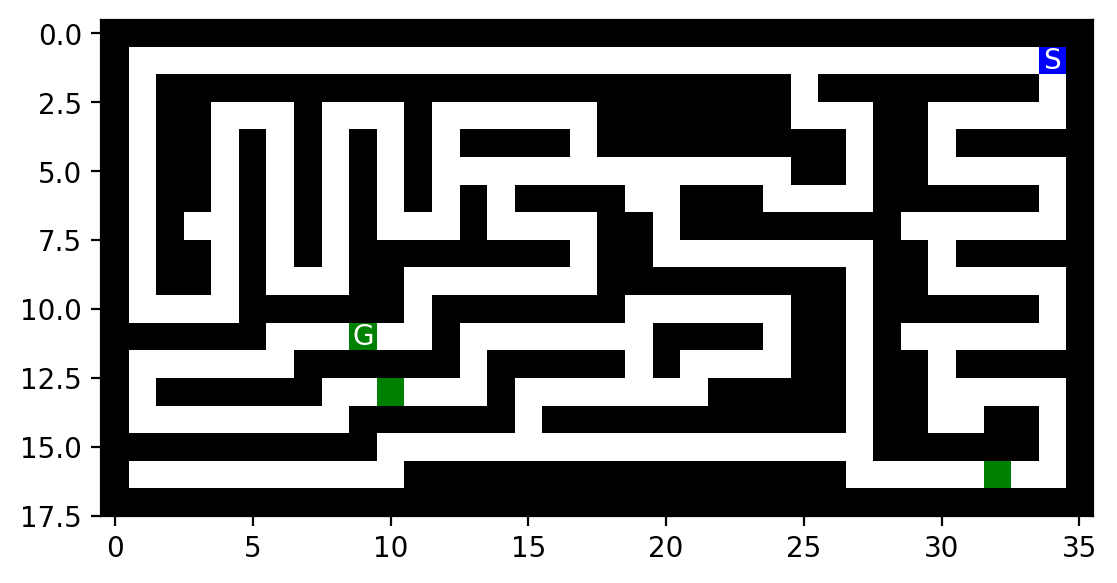

,Algorithm,Path Cost,Number of Nodes Expanded,Max Tree Depth,Max Frontier Size,Goal Position
0,IDS,41,274,41,42,"(16, 32)"
1,DFS,146,264,146,98,"(13, 10)"
2,BFS,41,151,41,8,"(16, 32)"


In [676]:
### Medium 2 Maze
with open("./mazes/medium_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

result1 = ids(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result2 = dfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))
result3 = bfs(maze, mh.find_pos(maze, "S"), mh.find_pos(maze, "G"))

table = pd.DataFrame(columns=['Algorithm', 'Path Cost', 'Number of Nodes Expanded', 'Max Tree Depth', 'Max Frontier Size', 'Goal Position'])
table['Algorithm'] = ['IDS', 'DFS', 'BFS']
table['Path Cost'] = [result1[1], result2[1], result3[1]]
table['Number of Nodes Expanded'] = [result1[2], result2[2], result3[2]]
table['Max Tree Depth'] = [result1[3], result2[3], result3[3]]
table['Max Frontier Size'] = [result1[5], result2[5], result3[5]]
table['Goal Position'] = [result1[0][-1].pos, result2[0][-1].pos, result3[0][-1].pos]
table

### Discussion

The first step to compare IDS to other algorithms was to create new sample mazes, based on the medium maze, with more goals. So two more mazes were created with 3 goals total in different positions, and IDS, DFS, and BFS were run on each of them. The results can be seen above. The first thing to note is that in both experiments IDS and BFS are able to find the optimal path to the closest goal, while DFS is not able to. This is an intersting observation since it would be thought that IDS and DFS would perform similarily since IDS uses DFS under the hood. However, it is clear from the results that IDS and BFS are most similar in terms of the features that were recorded. This is due to that fact that IDS is complete, like BFS, and can find the optimal path by gradually increasing the depth that it explores.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [646]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [647]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [648]:
# Your code/answer goes here